## Students
Please fill in your names and S/U-numbers:
* Linda Schmeitz, S1042449
* Enrico Schmitz, s1047521
* Charlotte Cambier van Nooten, s1044122

# Statistical Machine Learning 2020
# Assignment 3
# Deadline: 2 December 2020
## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells unless necessary, try to write the answers only in the provided cells. Before you turn this problem in, __make sure everything runs as expected__. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload the exercises to Brightspace as a single .zip file containing the submitter's S/U-number: 'SML20_as03_&lt;S/U-number&gt;.zip'__, for example 'SML20_as03_S123456.zip'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl.

## Introduction
Assignment 3 consists of:
1. The faulty lighthouse (40 points);
2. Neural network regression (30 points);
3. __Bayesian polynomial regression (30 points)__.

## Libraries

First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [ ]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

import numpy as np
import matplotlib.pyplot as plt
import math

# Set fixed random seed for reproducibility
np.random.seed(2020)

## Bayesian polynomial regression (30 points)
In this exercise, we will consider _Bayesian_ treatment of polynomial regression. Recall polynomial regression 
$$
t_{n} = \omega_{0} + \omega_{1}x_{n} + \omega_{2} x_{x}^{2}+\dots+\omega_{M}x_{n}^{M}+\epsilon_{n}, 
$$
where $\epsilon_{n}\sim N(0, \sigma^{2})$. In the vector form we have 
$$
t_{n} = \boldsymbol{w}^{T}\boldsymbol{x}_{n}+\epsilon_{n}, 
$$
where $\boldsymbol{w}=[w_{0}, \dots, w_{K}]^{T}$ and $\boldsymbol{x}_{n}=[1,x_{n}, x_{n}^{2}, \dots, x_{n}^{K}]$. Further, let us stack all responses in one vector $\boldsymbol{t}=[t_{1}, \dots, t_{N}]^{T}$, all inputs in a single matrix $\boldsymbol{X}=[\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, \dots, \boldsymbol{x}_{N}]^{T}$. Then we get for the whole data set
$$
\boldsymbol{t}=\boldsymbol{X}\boldsymbol{w}+\boldsymbol{\epsilon},
$$
where $\boldsymbol{\epsilon}=[\epsilon_{1}, \dots, \epsilon_{N}]^{T}$. 
Assume that we know the true value of  $\sigma^{2}$. 

1. Derive the posterior distribution of $\boldsymbol{\omega}$, i.e. $p(\boldsymbol{\omega}|\boldsymbol{t}, \boldsymbol{X}, \sigma^{2})$.  
Hint: Use the prior $p(\boldsymbol{\omega}|\boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})=N(\boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})$ and the fact that the posterior should be Gaussian. 

prior: 
$$ p(w|\mu_o, \Sigma_0) = \mathcal{N}(\mu_0, \Sigma_0) = \frac{1}{\sqrt{2\pi}\Sigma_0} exp(-\frac{1}{2\Sigma_0^2}(w-\mu_0)^2)$$

likelihood:
$$p(t|x_n,w,\sigma^2) \sim \mathcal{N}(w^T x_n, \sigma^2)$$ due to $\epsilon_{n}\sim N(0, \sigma^{2})$

$$p(t|X,w,\sigma^2) = \prod^{N}_{n=1} \mathcal{N}(t_n|w^T x_n,\sigma^2)$$ 

log-likelihood:
$$\ln p(t|w,\sigma^2) = \sum^{N}_{n=1} \ln \mathcal{N}(t_n|w^T x_n, \sigma^2)$$
$$ = \frac{N}{2}\ln (\sigma^2) - \frac{N}{2} \ln (2\pi) - \sigma^2 (\frac{1}{2}\sum^{N}_{n=1}\{t_n-w^T x_n\}^2)$$

posterior:
$$\text{posterior} \propto \text{likelihood} * \text{prior}$$

-----
$$p(w|t,X,\sigma^2) \propto  [\frac{N}{2}\ln (\sigma^2) - \frac{N}{2} \ln (2\pi) - \sigma^2 (\frac{1}{2}\sum^{N}_{n=1}\{t_n-w^T x_n\}^2)]*[\frac{1}{\sqrt{2\pi}\Sigma_0} exp(-\frac{1}{2\Sigma_0^2}(w-\mu_0)^2)]$$





2. Take the first order polynomial, the the inputs are $\boldsymbol{x_{n}}=[1, x_{n}]^{T}$. Let $\boldsymbol{\mu_{0}}=[0,0,\dots,0]^{T}$. Then the posterior mean for the linear Gaussian model is
$$
\boldsymbol{\mu_{\omega}}=(\boldsymbol{X}^{T}\boldsymbol{X}+ \sigma^2 \boldsymbol{\Sigma_{0}^{-1}})^{-1}\boldsymbol{X}^{T}\boldsymbol{t}.
$$
Recall also the regularised least squares solution:
$$
\hat{\boldsymbol{\omega}}=(\boldsymbol{X}^{T}\boldsymbol{X}+N\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^{T}\boldsymbol{t}.
$$
Find $\boldsymbol{\Sigma_{0}}$ that makes Equation 1 and Equation 2 identical. Reflect on the similarity between MAP solution and regularized least squares. Comment on what it implies for the effect of the prior.

$$ \sigma^2 \boldsymbol{\Sigma_{0}^{-1}} = N\lambda\boldsymbol{I}$$

$$ \boldsymbol{\Sigma_{0}^{-1}} = \frac{N\lambda\boldsymbol{I}}{\sigma^2}$$

$$ \boldsymbol{\Sigma_{0}} = [\frac{N\lambda\boldsymbol{I}}{\sigma^2}]^{-1}$$

Maximizing the MAP solution will give the minimization of the regularized least squares. 

When having a uniform prior it will lead to the same solution for maximum likelihood estimate and the MAP, posterior and likelihood are proportional under this uniform prior. 
When having a non-uniform prior the MAP will give different results.


3. Generate data from the polynomial function
$$
t= 5x^{3} - x^{2} +x
$$
and add Gaussian noise with the mean zero and variance 150 and plot your data.

First define the function $t$.

In [ ]:
def f(x):
    """
    Define the polynomial function f(x).
    """
    t = 5*x**3 - x**2 + x
    return t

In [ ]:
"""
Test the polynomial function f(x).
"""

'\nTest the polynomial function f(x).\n'

Now plot the data generated by the function with a mean of 0 and a variance of 150.

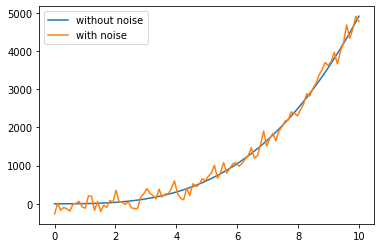

In [ ]:
"""
Plot the polynomial function t(x) with added Gaussian noise.
"""
x = np.linspace(0, 10, 100)
gauss_noise = np.random.normal(0,150,len(x))
function = f(x) + gauss_noise 

plt.plot(x, f(x), label='without noise')
plt.plot(x, function, label='with noise')
plt.legend()

4. Compute the marginal likelihood for the models from first to seventh order and make a plot of the marginal likelihood for these models (polynomial order on the x-axis and marginal likelihood value on the y-axis). Use a Gaussian prior on $\boldsymbol{\omega}$ with **zero mean** and an **identity covariance matrix**.

Hints: 
1) If you are computing log marginal likelihood (which you probably are), you might want to take exponent of that when making the plots. You can use `matplotlib.pyplot.bar` for making the bar plot.  
2) The marginal likelihood (also known as the model evidence) for our Gaussian model is defined as $p(\boldsymbol{t}|\boldsymbol{X}, \boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})$. Using Gaussian distributions as before we can compute
$$
p(\boldsymbol{t}|\boldsymbol{X}, \boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})= N(\boldsymbol{X}\boldsymbol{\mu_{0}}, \sigma^{2}\boldsymbol{I}_{N}+\boldsymbol{X}\boldsymbol{\Sigma_{0}}\boldsymbol{X}^{T}).
$$

In [ ]:
def marginal_loglikelihood(X, N, t, sigma=1):
    """
    Calculate the marginal likelihood.

    Parameters
    ----------
    X : Nx1 array
        The array containing the random data points.
    N : numeric
        The number of data points.
    t : Nx1 array
        The array containing the random data points with Gaussian noise.

    Returns
    -------
    list
        Marginal loglikelihoods for different polynomial orders.
    """
    mu_0 = np.zeros(N).T
    sigma2 = sigma**2
    lambda_ = 1/sigma2
    identity_cov_matrix = np.identity(N)
    Sigma_0 = np.linalg.inv((N*lambda_*identity_cov_matrix)/sigma2)

    polynomials = range(1,8)
    MLLH = []
    for poly in polynomials:
        X_P = X[:poly-1]

        variance_normal = (sigma2*identity_cov_matrix)+(np.dot(Sigma_0,np.dot(X_P.T,X_P)))
        part1 = (N/2)*np.log(variance_normal)
        part2 = (N/2)*np.log(2*math.pi)
        part3 = np.dot(variance_normal,(0.5*sum((t-f(X_P))**2)))
        marginal_log = part1 - part2 - part3

        MLLH.append(float(marginal_log))
    return MLLH

    

In [ ]:
"""
Test for marginal_loglikelihood.
"""
assert type(marginal_loglikelihood(np.full((1, 1), 0), 1, np.full((1, 1), 0))) is list

Now plot the results with the help of `marginal_loglikelihood`.

<BarContainer object of 7 artists>

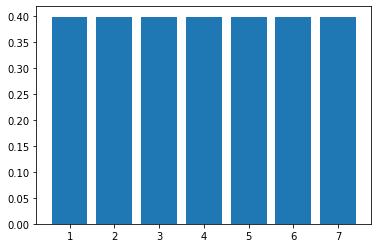

In [ ]:
"""
Plot the results of the marginal loglikelihood.
"""
MLLH_ = marginal_loglikelihood(np.full((1, 1), 0), 1, np.full((1, 1), 0))
plt.bar(list(range(1,8)),np.exp(MLLH_))

Comment on your results. Which model would you choose according to the marginal likelihood?  

We would like to choose the simpelest model with the highest probability, so the model with the first order polynomial.

4. How would the prior affect the choice of polynomial using marginal likelihood? Let $\boldsymbol{\Sigma_{0}}=\sigma_{0}^{2}\boldsymbol{I}$ and vary $\sigma_{0}^{2}$: what happens when you increase and decrease $\sigma_{0}^{2}$? Plot the marginal likelihood fror various polynomial orders (from 1 to 7) for $\sigma_{0}^{2}=0.1$ , $\sigma_{0}^{2}=0.3$, $\sigma_{0}^{2}=0.4$, $\sigma_{0}^{2}=0.7$, $\sigma_{0}^{2}=1.3$, $\sigma_{0}^{2}=1.4$, $\sigma_{0}^{2}=1.7$.

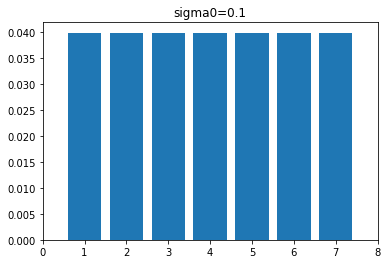

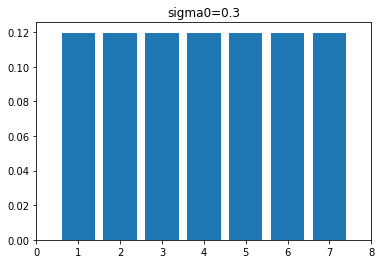

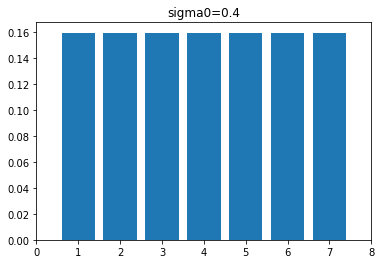

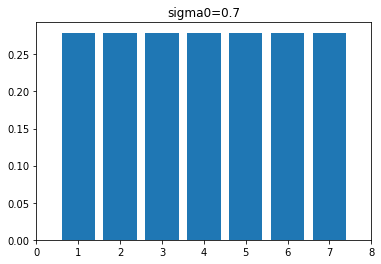

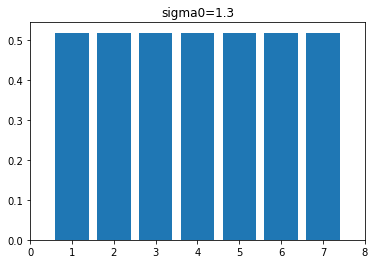

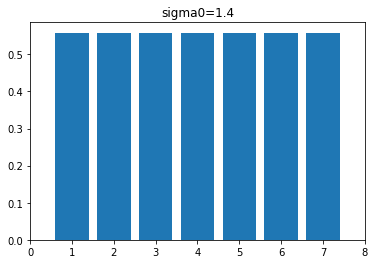

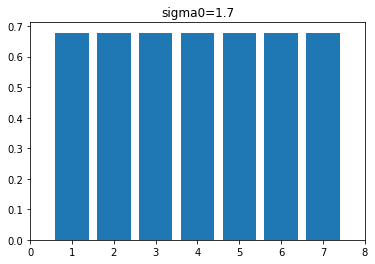

In [ ]:
"""
Plot the results of the marginal loglikelihood with different sigmas.
"""
def marginal_loglikelihood(X, N, t, sigma_0, sigma=1):
    """
    Calculate the marginal likelihood.

    Parameters
    ----------
    X : Nx1 array
        The array containing the random data points.
    N : numeric
        The number of data points.
    t : Nx1 array
        The array containing the random data points with Gaussian noise.
    
    Returns
    -------
    list
        Marginal loglikelihoods for different polynomial orders.
    """
    mu_0 = np.zeros(N).T
    sigma2 = sigma_0**2
    identity_cov_matrix = np.identity(N)
    Sigma_0 = (sigma_0**2)*identity_cov_matrix

    polynomials = range(1,8)
    MLLH = []
    for poly in polynomials:
        X_P = X[:poly-1]

        variance_normal = (sigma2*identity_cov_matrix)+(np.dot(Sigma_0,np.dot(X_P.T,X_P)))
        part1 = (N/2)*np.log(variance_normal)
        part2 = (N/2)*np.log(2*math.pi)
        part3 = np.dot(variance_normal,(0.5*sum((t-f(X_P))**2)))
        marginal_log = part1 - part2 - part3

        MLLH.append(float(marginal_log))

    return MLLH

sigma0 = np.array([0.1,0.3,0.4,0.7,1.3,1.4,1.7])
for i in sigma0:
    plt.bar(list(range(1,8)),np.exp(marginal_loglikelihood(np.full((1, 1), 0), 1, np.full((1, 1), 0), sigma_0=i, sigma=1)))
    plt.title('sigma0='+str(i))
    plt.xlim(0, 8) 
    plt.show()

Comment on the effect of changing $\sigma_{0}^{2}$. What does it in general imply for such type of modeling choice (i.e. for Bayesian way of estimation for the polynomial regression)?

Taking a higher value of $\sigma_{0}^{2}$  is resulting in a higher value of the likelihood. So increasing the $\sigma_{0}^{2}$  is giving a better likelihood.